<a href="https://colab.research.google.com/github/rdonald03/cap-comp215/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<font color = 'cyan'> Langton's Ant
</font>

#### Name: Ryan Donald
#### Date: April 14 2023

This notebook explores Langtons Ant, and how it changes with different starting directions, and timesteps.

#Citations

Used Animation2D class as well as plot_2D_array from previous labs to help animate the module

https://numpy.org/doc/stable/user/index.html#user

https://docs.python.org/3/library/time.html

Used this webpage to compare my model to make sure it was running correctly: https://josephpetitti.com/ant

#Importation of necessary modules/ Configuration of the notebook


In [321]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from matplotlib import animation
import timeit
matplotlib.rc('animation', html='jshtml')

#Code from previous labs to help with the animation of Langton's Ant

In [322]:

def plot_2D_array(array, axes=None, title='', **options):
    """ Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue. """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    axes.set_xticks([], [])  # remove axes tick marks
    axes.set_yticks([], [])
    axes.imshow(array, **options)

class Animation2D:
    """
      Animates any 2D model with a step() method and a draw() method, using matplotlib
      model.step() should take no parameters - just step the model forward one step.
      model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number

      See https://www.allendowney.com/blog/2019/07/25/matplotlib-animation-in-jupyter/
          for a discussion of the pros and cons of various animation techniques in jupyter notebooks
    """

    def __init__(self, model, frames=50, steps_per_frame=1, figsize=(8, 8)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.steps_per_frame = steps_per_frame
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            for _ in range(self.steps_per_frame):
                self.model.step()
        self.model.draw(self.ax, step=step * self.steps_per_frame)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()  # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)  # add the figure back to pyplot ** sigh **
                self.animation_step(i)
                plt.show()  # show the current animation frame (pyplot then closes and throws away figure ** sigh **)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

#Langton's Ant Model

In [323]:
class Ant2D:

  cmap = plt.cm.binary

  def __init__ (self, x_size, y_size, direction):
    '''Initializes the Langstons Ant model
    x_size = size of array in x direction
    y_size = size of array in y direction
    x, y pos = position of the ant
    direction = direction the ant is facing
    
    
    
     '''
    self.x_size = x_size
    self.y_size = y_size
    self.array = np.zeros((x_size, y_size), dtype=int)
    self.all_directions = ['up', 'right','down', 'left']
    self.direction = direction    #0 = up, 1 = right, 2 = down, 3 = left. Change for a different starting direction
    self.x_pos = (x_size // 2)
    self.y_pos = (y_size // 2)

  def step (self):
    '''Performs one time step of Langstons Ant, applying all rules'''
    state = self.array[self.y_pos, self.x_pos]
    if state == 0:
      self.direction = (self.direction - 1)%4 #if on white square, turn left. Alter to different things to experiment
    elif state == 1:
      self.direction = (self.direction + 1)%4 #if on dark square, turn right Alter to different things to experiment
    self.array[self.y_pos, self.x_pos] = 1 - self.array[self.y_pos, self.x_pos]
    if self.all_directions[self.direction] == 'up':
      self.y_pos -= 1
    elif self.all_directions[self.direction] == 'down':
      self.y_pos += 1
    elif self.all_directions[self.direction] == 'left':
      self.x_pos -= 1
    elif self.all_directions[self.direction] == 'right':
      self.x_pos += 1


  def draw (self, axes=None, step=''):
    '''Draws an instance of langtons ant '''
    axes or plt.axes
    title = f'Langtons Ant, Timestep:{step}'
    plot_2D_array(self.array, axes=axes, title=title, cmap = self.cmap)







#Specific time step of the model

In [324]:
def see_specific (model, time_step):
  '''Draws a specific timestep of langtons ant'''
  for i in range (time_step):
    model.step ()
  model.draw (step=time_step)
  




#Animation 

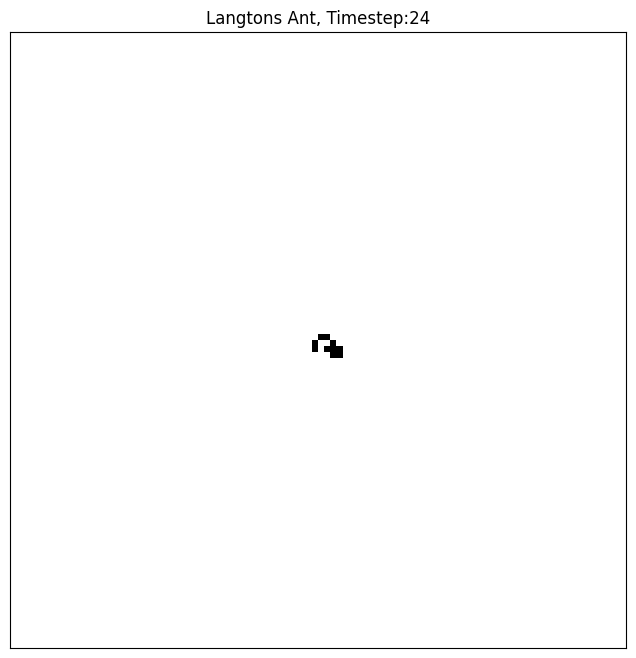

In [325]:
x = Ant2D (x_size=100, y_size=100, direction=0)
b = Animation2D (x, 6000)
b.animate ()

#Experimenting with starting direction and long periods.
We can see that with different starting directions, the pattern as a whole follows the inital direction. The final plot, for 'up' will be entirely identical to 'right', but will have been moved clockwise persay.

We can also see that the ant will always end up building a repeating pattern after a given number of timesteps, no matter the starting direction

Another interesting thing is that no matter the rules of turning up, left, right or down on a specific color, langton's ant will always reach a pattern that is repeating, whether that be moving in a single direction infinetly, or in a circle, or creating some form of "highway".

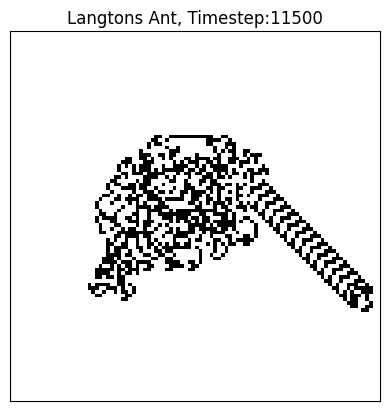

In [326]:
f = 11500
a = Ant2D(100, 100, 0)
b = Ant2D(100, 100, 1)
c = Ant2D(100, 100, 2)
d = Ant2D(100, 100, 3)

see_specific (a, f) #Change a-d to see up, right, down, left






#Algorithm Analysis

* The time complexity of the step function that 
applies all rules, and essentially is the main part of this model is O(1), meaning that no matter the size of the input, it will always take the same amount of time to run one step. Although, larger inputs will effect the model as a whole, as it will have to run more steps, but the time it takes to run one step will not change.

Note that this is just for the model, as the animation of the model would be different, but the simulation itself is O(1)

In [327]:
#Had trouble using timeit, so decided to use time instead
ant = Ant2D(x_size = 1000000, y_size= 1000000, direction = 0)

ttime = 0
for i in range (10):
  start = time.time ()
  ant.step ()
  end = time.time ()
  ttime += end - start

final = ttime / 10

print (f"Average time to run: {final:.7f} seconds")

Average time to run: 0.0000058 seconds


* As we can see above, no matter the input size for x_size and y_size, the time to run stays the same.

Note: Time does change somewhat by very very tiny margins, but is not due to model, but due external factors such as caching